## Написание моделей классификации и сравнение и сравнение метрик


##  Импрот библио

In [25]:
import numpy as np
import pandas as pd
from typing import Optional, List
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.base
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
import math
from sklearn.neighbors import KNeighborsClassifier


seed = 24


## Cчитываем наш тестовый файл и выводим случайую выборку


In [26]:
df = pd.read_csv('churn_test.csv')
df.sample(20)

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2024,1,50,0,2,5,2,4,0,36,5,3,2,1721.0,1037,684.0,0.721,2681,57,0.727,0.603
363,1,58,0,2,5,1,1,0,53,6,2,3,2019.0,1380,639.0,1.158,2005,62,0.590,0.684
3337,1,47,0,3,3,1,4,0,36,6,2,3,6524.0,1993,4531.0,0.815,4267,66,0.886,0.305
6133,1,49,0,3,6,1,4,1,30,4,3,2,15987.0,0,15987.0,0.658,4146,69,0.533,0.000
2555,1,58,1,3,3,1,0,0,50,6,2,4,12698.0,2361,10337.0,0.799,4425,75,0.630,0.186
6288,0,39,0,3,5,1,5,0,30,6,3,4,3023.0,1348,1675.0,0.358,2219,44,0.630,0.446
2161,1,46,1,2,6,1,2,0,36,3,2,2,5746.0,1572,4174.0,0.937,3446,56,1.000,0.274
3762,1,48,1,4,6,2,3,0,38,5,2,3,5543.0,1372,4171.0,0.744,5266,79,0.795,0.248
1806,1,40,0,2,6,1,4,0,36,3,1,1,5093.0,2376,2717.0,0.822,2341,57,0.541,0.467
5604,1,50,1,3,2,2,2,0,38,4,1,1,10762.0,703,10059.0,0.548,4509,71,0.543,0.065


## Выводим информацию о наших данных

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6972 entries, 0 to 6971
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     6972 non-null   int64  
 1   Customer_Age              6972 non-null   int64  
 2   Gender                    6972 non-null   int64  
 3   Dependent_count           6972 non-null   int64  
 4   Education_Level           6972 non-null   int64  
 5   Marital_Status            6972 non-null   int64  
 6   Income_Category           6972 non-null   int64  
 7   Card_Category             6972 non-null   int64  
 8   Months_on_book            6972 non-null   int64  
 9   Total_Relationship_Count  6972 non-null   int64  
 10  Months_Inactive_12_mon    6972 non-null   int64  
 11  Contacts_Count_12_mon     6972 non-null   int64  
 12  Credit_Limit              6972 non-null   float64
 13  Total_Revolving_Bal       6972 non-null   int64  
 14  Avg_Open

## Дропаем целевую переменную чурн из x и записывыем её в y

In [28]:
X = df.drop(columns='churn')
Y = df.churn

## Выводим таблицу с данными x

In [29]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
2,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
3,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
4,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6967,48,1,4,0,1,3,0,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
6968,33,0,1,1,2,4,0,15,1,1,3,3709.0,1180,2529.0,0.645,8130,74,0.897,0.318
6969,49,0,4,5,1,1,0,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
6970,52,0,5,6,1,4,0,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


# Выводим колонку y churns

In [30]:
Y


0       1
1       1
2       1
3       0
4       1
       ..
6967    0
6968    0
6969    0
6970    0
6971    0
Name: churn, Length: 6972, dtype: int64

## Разделяем данные на  train и test часть 80 на 20

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

print(f"Train : {X_train.shape} {Y_train.shape}")
print(f"Test : {X_test.shape} {Y_test.shape}")

Train : (5577, 19) (5577,)
Test : (1395, 19) (1395,)


## Стоит понимать, что мы решаем задачу классицфикации и линейные модели нам никак не подойдут

### Дерево решений

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=seed)
clf.fit(X_train,Y_train)                      

DecisionTreeClassifier(random_state=24)

<Axes: >

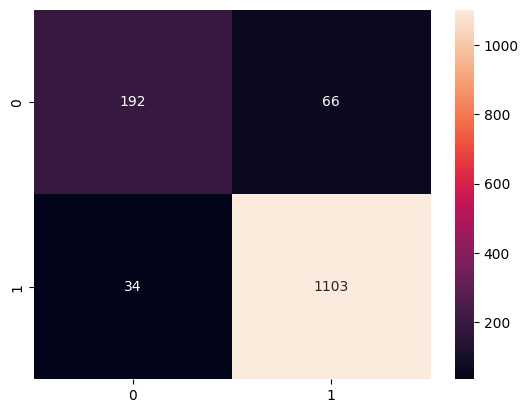

In [33]:
y_pred = clf.predict(X_test)
y_true = Y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True, fmt='d')

In [34]:
print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.74      0.79       258
           1       0.94      0.97      0.96      1137

    accuracy                           0.93      1395
   macro avg       0.90      0.86      0.88      1395
weighted avg       0.93      0.93      0.93      1395

Accuracy: 0.9283154121863799


### AdaBoostClassifier

<Axes: >

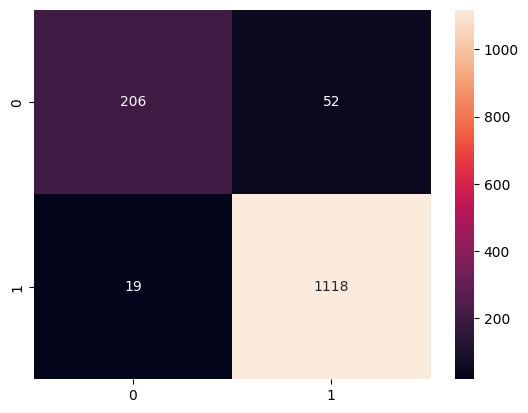

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=seed)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_true = Y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True, fmt='d')

In [36]:
print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.80      0.85       258
           1       0.96      0.98      0.97      1137

    accuracy                           0.95      1395
   macro avg       0.94      0.89      0.91      1395
weighted avg       0.95      0.95      0.95      1395

Accuracy: 0.9491039426523298


### GradoentBoosting

<Axes: >

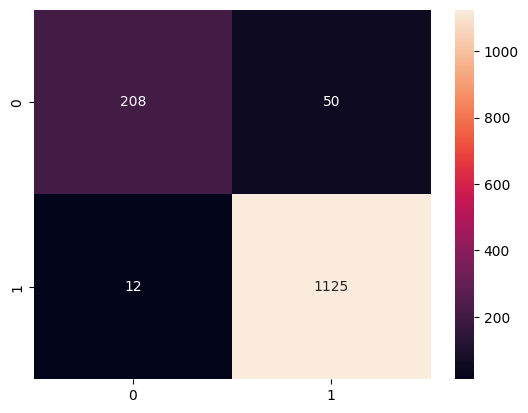

In [37]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=seed)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_true = Y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True, fmt='d')

In [38]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(y_true, y_pred))

Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       258
           1       0.96      0.99      0.97      1137

    accuracy                           0.96      1395
   macro avg       0.95      0.90      0.92      1395
weighted avg       0.96      0.96      0.95      1395



### K-NN (сначала скейлим данные через стандарт скейлер)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = KNeighborsClassifier(n_neighbors=2)

In [41]:
model.fit(X_train_scaled, Y_train)


KNeighborsClassifier(n_neighbors=2)

<Axes: >

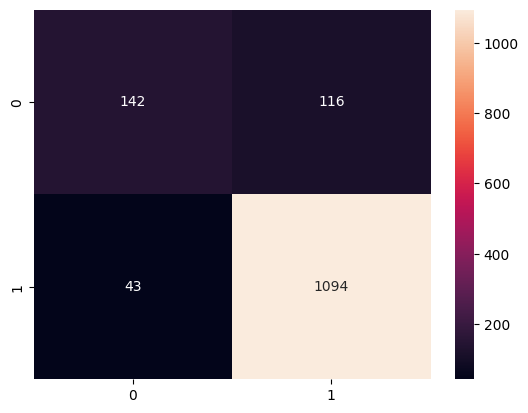

In [42]:
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_true = Y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True, fmt='d')

​
​
    

In [43]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.8896057347670251
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       258
           1       0.94      0.92      0.93      1137

    accuracy                           0.89      1395
   macro avg       0.81      0.84      0.82      1395
weighted avg       0.89      0.89      0.89      1395



<Axes: >

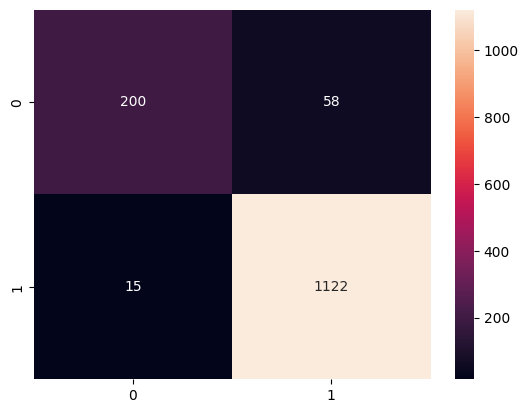

In [44]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_true = Y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True, fmt='d')

In [45]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.8896057347670251
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       258
           1       0.94      0.92      0.93      1137

    accuracy                           0.89      1395
   macro avg       0.81      0.84      0.82      1395
weighted avg       0.89      0.89      0.89      1395



ВЫвод


#### Обучив модели классификации и сравних их показатели по f1-score(особенно полезен в задачах с несбалансированными классами, где простая точность может быть вводящей в заблуждение) я могу с точностью сказать, что свою работу с большей точностью сделал градиент бустинг f1 по 0 = 0.87 и с меньшей точностью KNN. Всё конечно очень интересно, но хотелось бы немноого более углубленного обхяснения на более понятном языке, ибо статьи напечатаны на буржуйском 